<a href="https://colab.research.google.com/github/AnishFathima-Z/Human_Activity_Recognizer/blob/main/Human_Activity_Recognition_with_Smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Importing the Dataset


In [2]:
data = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/test.csv")

Displaying top 4 rows of the dataset

In [3]:
data.head(4)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING


Check last 4 rows of the dataset

In [4]:
data.tail(4)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [5]:
print(data.shape)
print(data.isnull().sum())

(7352, 563)
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [6]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])


Number of Rows 7352
Number of columns 563


 Taking Care of Duplicate Values


In [7]:
data.duplicated().any()#no duplicated rows on our dataset


np.False_

In [8]:
duplicated_columns = data.columns[data.T.duplicated()].tolist()
len(duplicated_columns)

21

In [9]:
data = data.drop(duplicated_columns,axis=1)#axis=1 means column


In [10]:
data.shape


(7352, 542)

Taking Care of Missing Values


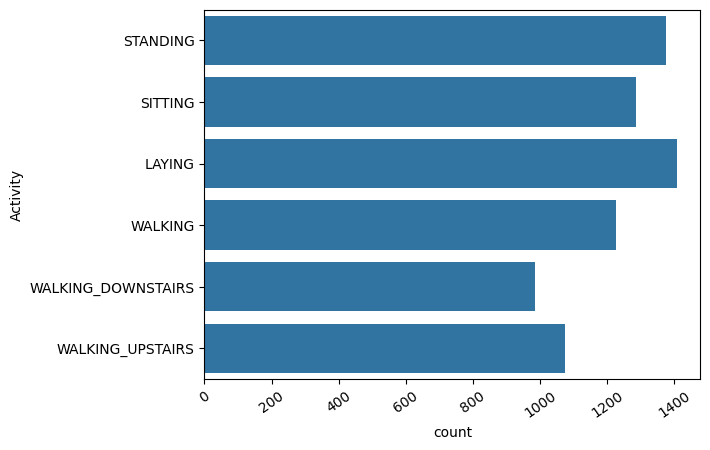

In [11]:
sns.countplot(data['Activity'])
plt.xticks(rotation=35)
plt.show()

 Store Feature Matrix In X and Response(Target) In Vector y


In [12]:
X = data.drop('Activity',axis=1)
y= data['Activity']

In [13]:
y.head(4)

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
y

array([2, 2, 2, ..., 5, 5, 5])

 Splitting The Dataset Into The Training Set And Test Set


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.9802855200543847

In [18]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=100, step=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['tBodyAcc-std()-X', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'tBodyAcc-energy()-X', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-max()-X',
       'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X',
       'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
       'tGravityAcc-energy()-Z', 'tGravityAcc-entropy()-X',
       'tGravityAcc-entropy()-Y', 'tGravityAcc-arCoeff()-X,1',
       'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4',
       'tGravityAcc-correlation()-X,Y', 'tBodyAccJerk-std

In [19]:
print(len(selected_features))

100


In [20]:
rf = RandomForestClassifier()
rf.fit(X_train_selected,y_train)

RandomForestClassifier()

In [21]:
y_pred_rf = rf.predict(X_test_selected)
accuracy_score(y_test,y_pred_rf)

0.981645139360979

In [22]:
rf.predict(X_test_selected)

array([4, 4, 3, ..., 1, 1, 1])

In [23]:
df1=pd.DataFrame(y_pred_rf,columns=['Predicted Activity'])
df1['Actual Activity']=y_test
df1.head()

,Predicted Activity,Actual Activity
0,4,4
1,4,4
2,3,3
3,1,1
4,4,4
